In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16,preprocess_input

In [ ]:
dataset_dir=r"C:\Users\Apeksha\Downloads\caltech-101-img\caltech-101-img"

In [ ]:
datagen=ImageDataGenerator(preprocessing_function=preprocess_input,validation_split=0.2)
batch_size=200
img_size=(64,64)

train_gen=datagen.flow_from_directory(
    dataset_dir,
    batch_size=batch_size,
    target_size=img_size,
    class_mode='categorical',
    subset='training'
)

val_gen=datagen.flow_from_directory(
    dataset_dir,
    batch_size=batch_size,
    target_size=img_size,
    class_mode='categorical',
    subset='validation'
)

num_classes=train_gen.num_classes
print(num_classes)

Found 7356 images belonging to 102 classes.
Found 1788 images belonging to 102 classes.
102


In [1]:
weight_path=r'C:\Users\Apeksha\Downloads\vgg\vgg\vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
base_model=VGG16(weights=weight_path,include_top=False,input_shape=(64,64,3))
for layer in base_model.layers:
    layer.trainable=False

NameError: name 'VGG16' is not defined

In [ ]:
from tensorflow.keras.optimizers import Adam
model=keras.Sequential([
    base_model,
    keras.layers.Flatten(),
    keras.layers.Dense(256,activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(num_classes,activation='softmax')
])
model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train_gen, epochs=5, validation_data=val_gen)

Epoch 1/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 115s 3s/step - accuracy: 0.3308 - loss: 8.9714 - val_accuracy: 0.4497 - val_loss: 2.7048
Epoch 2/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.5004 - loss: 2.3549 - val_accuracy: 0.5347 - val_loss: 2.3590
Epoch 3/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.6026 - loss: 1.7526 - val_accuracy: 0.5688 - val_loss: 2.2245
Epoch 4/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.6778 - loss: 1.3266 - val_accuracy: 0.6018 - val_loss: 2.1608
Epoch 5/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.7325 - loss: 1.0515 - val_accuracy: 0.6242 - val_loss: 2.0445


In [ ]:
for layer in base_model.layers:
    if "block5" in layer.name:
        layer.trainable=True
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train_gen, epochs=5, validation_data=val_gen)

Epoch 1/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 61s 2s/step - accuracy: 0.6962 - loss: 1.2677 - val_accuracy: 0.6393 - val_loss: 1.9275
Epoch 2/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 67s 2s/step - accuracy: 0.7712 - loss: 0.9228 - val_accuracy: 0.6745 - val_loss: 1.8446
Epoch 3/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 61s 2s/step - accuracy: 0.8221 - loss: 0.6773 - val_accuracy: 0.6918 - val_loss: 1.7419
Epoch 4/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step - accuracy: 0.8646 - loss: 0.4887 - val_accuracy: 0.7047 - val_loss: 1.7566
Epoch 5/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step - accuracy: 0.8919 - loss: 0.3915 - val_accuracy: 0.7002 - val_loss: 1.8157


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 171ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.68..151.061].


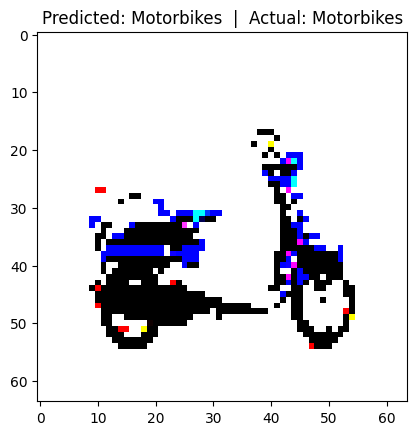

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x_batch, y_batch = next(val_gen)
preds = model.predict(x_batch)
labels = {v: k for k, v in train_gen.class_indices.items()}

n = 80
plt.imshow(x_batch[n])
plt.title(f"Predicted: {labels[np.argmax(preds[n])]}  |  Actual: {labels[np.argmax(y_batch[n])]}")
plt.show()